In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv('D:/aiml/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
Glucose=df.iloc[:,0].values
Outcome=df.iloc[:,1].values
(Glucose,Outcome)

(array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  8,  4, 10, 10,  1,  5,  7,  0,
         7,  1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6,
        10,  4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  7,  1,
         1,  5,  8,  7,  1,  7,  0,  0,  0,  2,  8,  5,  2,  7,  5,  0,  2,
         1,  4,  2,  5, 13,  4,  1,  1,  7,  5,  0,  2,  3,  2,  7,  0,  5,
         2, 13,  2, 15,  1,  1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,
         0,  1,  2,  1,  1,  4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,
         4,  0,  6,  2,  5,  0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,
         0,  0,  0,  5,  3,  5,  2, 10,  4,  0,  9,  2,  5,  2,  1,  4,  9,
         1,  8,  7,  2,  1,  2, 17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,
         6,  6,  2,  1,  2,  8,  6,  0,  5,  5,  6,  0,  1,  5,  4,  7,  8,
         1,  8,  5,  3,  9,  7, 11,  8,  5,  1,  3,  4,  4,  0,  1,  0,  2,
         6,  5,  8,  5,  1,  7,  2,  0,  7,  0,  9, 12,  5,  6,  5,  5,  0,
         2, 

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.shape

(768, 9)

In [10]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Text(0.5, 1.0, 'Glucose vs. Outcome of diabets')

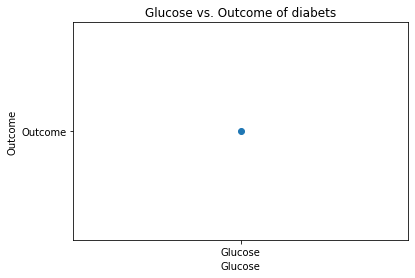

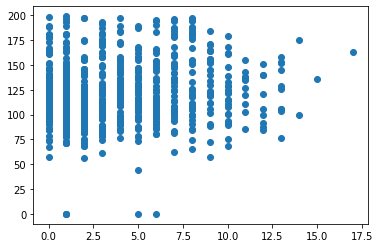

In [5]:
plt.scatter(Glucose,Outcome)